# Temperature Exploration

February 13, 2023  
Gully & Ryan H.

Using Fleck to create cartoons showing how starspots effect the flux of stars.

In [1]:
from batman import TransitParams
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from fleck import Star

In [2]:
planet = TransitParams()
planet.per = 88 # orbital period
planet.a = float(0.387*u.AU / u.R_sun) # Semi-major axis [in stellar radii].
planet.rp = 0.1 # Planet radius [in stellar radii].
planet.w = 90 # Argument of periapse [in degrees]
planet.ecc = 0 # Orbital eccentricity.
planet.inc = 89.65 # Orbital inclination [in degrees].
planet.t0 = 0 # Time of inferior conjunction.
planet.limb_dark = 'quadratic' # Limb darkening model
planet.u = [0.5079, 0.2239] # List of limb darkening coefficients.
planet.lam = 45

In [3]:
inc_stellar = 70 * u.deg
spot_radii = np.array([[0.1], [0.1]])
spot_lons = np.array([[0], [0]]) * u.deg
spot_lats = np.array([[25], [-25]]) * u.deg

In [4]:
times = np.linspace(-0.5, 0.5, 500)

In [5]:
star = Star(spot_contrast=0.7, u_ld=planet.u, rotation_period=10)

In [6]:
lc = star.light_curve(spot_lons, spot_lats, spot_radii,
                      inc_stellar, planet=planet, times=times)

/home/ryan/miniconda3/envs/contracosta/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


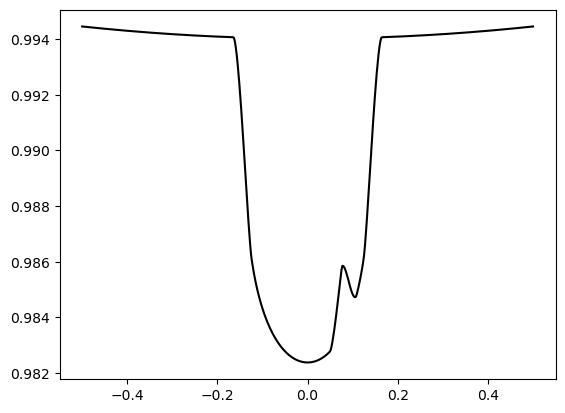

In [7]:
plt.plot(times, lc, color='k')
plt.show()

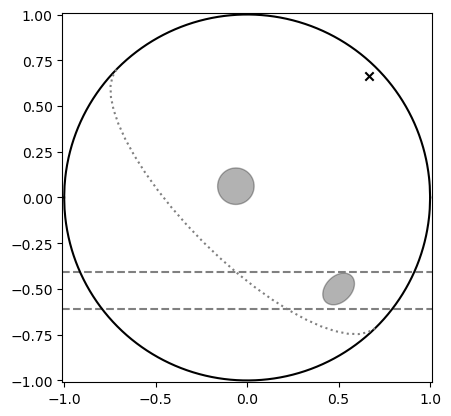

In [8]:
ax = star.plot(spot_lons, spot_lats, spot_radii, inc_stellar, planet=planet, time=0)
plt.show()